## Exams Grade Prediction 

Using dataset downloaded from Kaggle https://www.kaggle.com/spscientist/students-performance-in-exams

### 0. Loading data, wrangling and analyzing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
print(df.dtypes)
print(); print(df.isna().sum())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [4]:
df.shape

(1000, 8)

In [5]:
col = df.loc[:,"math score":"writing score"]
df['mean results'] = col.mean(axis=1).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [6]:
df.shape

(1000, 9)

In [7]:
df['mean results'] = pd.cut(df['mean results'], bins=[0, 40, 60, 70, 80, 90, 100], include_lowest=True, labels=['E', 'D', 'C', 'B', 'A', 'O'])
df['mean results'].replace({'E':0,'D':1,'C':2,'B':3,'A':4,'O':5}, inplace = True)

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results
0,female,group B,bachelor's degree,standard,none,72,72,74,3
1,female,group C,some college,standard,completed,69,90,88,4
2,female,group B,master's degree,standard,none,90,95,93,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,3


In [9]:
print(df['gender'].value_counts())
print(); print(df['race/ethnicity'].value_counts())
print(); print(df['parental level of education'].value_counts())
print(); print(df['lunch'].value_counts())
print(); print(df['test preparation course'].value_counts())

female    518
male      482
Name: gender, dtype: int64

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

standard        645
free/reduced    355
Name: lunch, dtype: int64

none         642
completed    358
Name: test preparation course, dtype: int64


In [10]:
mn,mx = df['mean results'].min(),df['mean results'].max()
print(mn,mx)

0 5


In [11]:
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean results                   0
dtype: int64


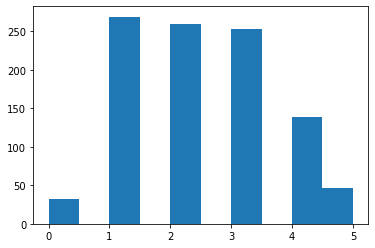

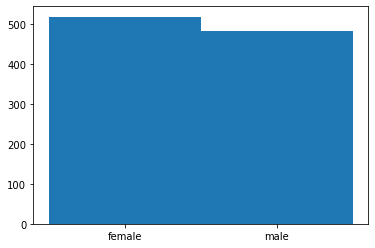

In [12]:
plt.hist(df['mean results'],bins=10)
plt.show()
plt.hist(df['gender'],bins=np.arange(3)-0.5)
plt.show()

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results
0,female,group B,bachelor's degree,standard,none,72,72,74,3
1,female,group C,some college,standard,completed,69,90,88,4
2,female,group B,master's degree,standard,none,90,95,93,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,3


In [14]:
df.groupby(['gender','test preparation course']).agg(['min','max','median','mean'])

math score                         \
                                      min  max median       mean   
gender test preparation course                                     
female completed                       23   99     67  67.195652   
       none                             0  100     62  61.670659   
male   completed                       39  100     73  72.339080   
       none                            27   97     67  66.688312   

                               reading score                         \
                                         min  max median       mean   
gender test preparation course                                        
female completed                          40  100     78  77.375000   
       none                               17  100     71  69.982036   
male   completed                          37  100     71  70.212644   
       none                               23   96     63  62.795455   

                               writing score                         \
                                         min  max median       mean   
gender test preparation course                                        
female completed                          36  100     79  78.793478   
       none                               10  100     70  68.982036   
male   completed                          38  100     70  69.793103   
       none                               15   92     60  59.649351   

                               mean results                       
                                        min max median      mean  
gender test preparation course                                    
female completed                          0   5      3  2.918478  
       none                               0   5      2  2.266467  
male   completed                          0   5      3  2.597701  
       none                               0   5      2  1.925325

In [15]:
obj_df = df.select_dtypes(include=['object']);

obj_df['gender'] = obj_df['gender'].astype('category');
obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category');
obj_df['parental level of education'] = obj_df['parental level of education'].astype('category');
obj_df['lunch'] = obj_df['lunch'].astype('category');
obj_df['test preparation course'] = obj_df['test preparation course'].astype('category');

obj_df["gender_cat"] = obj_df["gender"].cat.codes;
obj_df["race/ethnicity_cat"] = obj_df["race/ethnicity"].cat.codes;
obj_df["parental level of education_cat"] = obj_df["parental level of education"].cat.codes;
obj_df["lunch_cat"] = obj_df["lunch"].cat.codes;
obj_df["test preparation course_cat"] = obj_df["test preparation course"].cat.codes;

obj_df.head();

<ipython-input-15-d57c626d3eb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['gender'] = obj_df['gender'].astype('category');
<ipython-input-15-d57c626d3eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category');
<ipython-input-15-d57c626d3eb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [16]:
df_mean_cat = obj_df[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]
df_mean_cat.head()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [17]:
df_mean_cat['mean results'] = df['mean results']
df_mean_cat.head()

<ipython-input-17-601c45909cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_cat['mean results'] = df['mean results']


,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
0,0,1,1,1,1,3
1,0,2,4,1,0,4
2,0,1,3,1,1,5
3,1,0,0,0,1,1
4,1,2,4,1,1,3


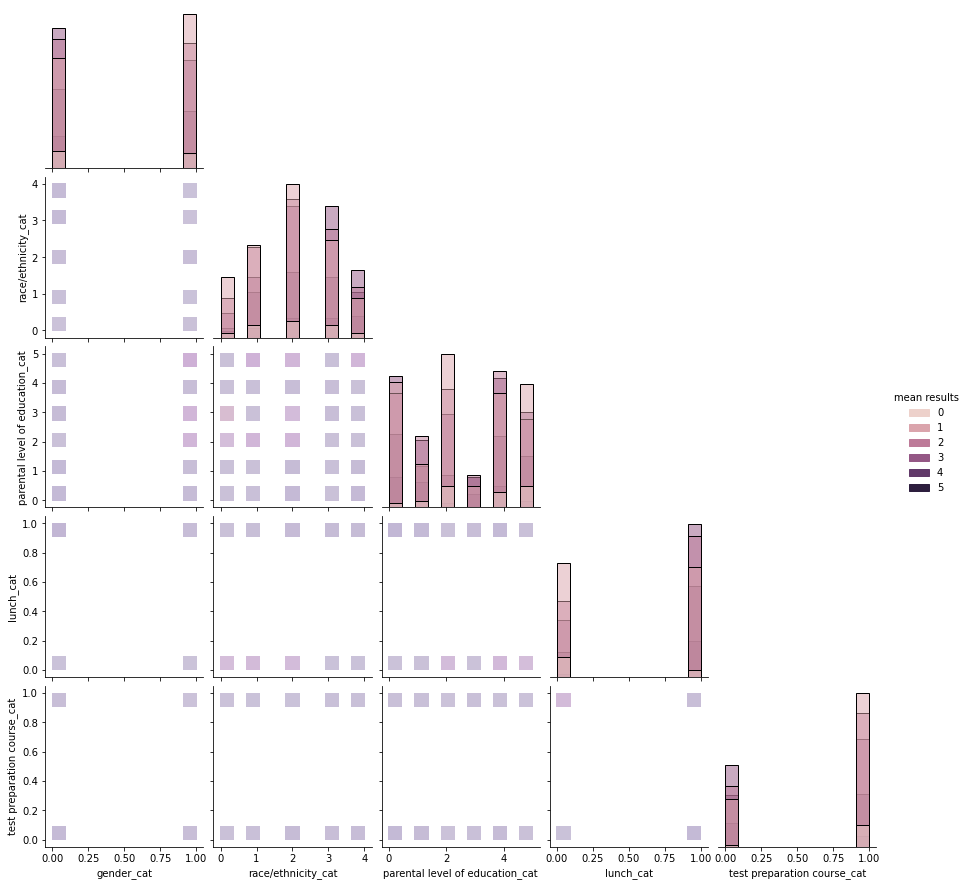

In [18]:
sns.pairplot(df_mean_cat, hue = 'mean results', kind = 'hist', corner = True);

In [19]:
df_mean_cat.corr()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
gender_cat,1.000000,-0.001502,0.001913,0.021372,-0.006028,-0.134015
race/ethnicity_cat,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.166539
parental level of education_cat,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.071889
lunch_cat,0.021372,0.046563,0.006320,1.000000,0.017044,0.279118
test preparation course_cat,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.257054
mean results,-0.134015,0.166539,-0.071889,0.279118,-0.257054,1.000000


### Multiclass Logistic Regression

In [20]:
# Creating X and y arrays
X = df_mean_cat[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']].values
y = df_mean_cat[['mean results']].values.astype(int)

# Normalizing X
X = StandardScaler().fit(X).transform(X)
print(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle=True);

# Fitting the classification model
clf = LogisticRegression(multi_class = 'multinomial').fit(X_train, y_train)

# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
print("logisticRegression Accuracy: ", accuracy_score(y_test, y_hat))
print("Training Accuracy :", clf.score(X_train, y_train))

[[-0.96462528 -1.01504393 -0.81264039  0.74188112  0.74674788]
 [-0.96462528 -0.15044092  0.82795259  0.74188112 -1.33914006]
 [-0.96462528 -1.01504393  0.28108826  0.74188112  0.74674788]
 ...
 [-0.96462528 -0.15044092 -0.26577606 -1.34792485 -1.33914006]
 [-0.96462528  0.71416208  0.82795259  0.74188112 -1.33914006]
 [-0.96462528  0.71416208  0.82795259 -1.34792485  0.74674788]]
logisticRegression Accuracy:  0.32
Training Accuracy : 0.3564705882352941


C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Multivariate linear regression

In [21]:
X.shape

(1000, 5)

% of events that are labeled between -1 grade and +1 grade of the exact grade =  77.0
Training Accuracy =  0.2182397378985571


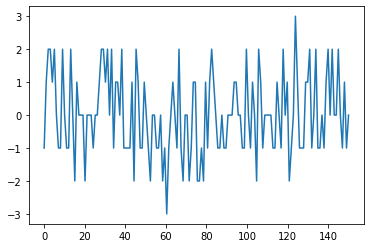

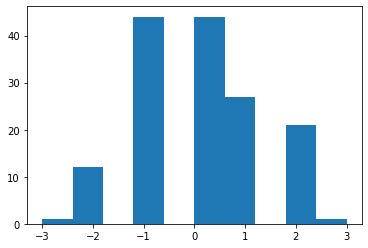

In [22]:
# Linear model setting, fitting and predicted values
lr = LinearRegression();
lr = lr.fit(X_train,y_train);

y_hat = lr.predict(X_test);

# Results obtained and plotting
results = (y_test - y_hat).round();
aa = (results == 0).sum()+(results == -1).sum()+(results == 1).sum()
bb = ((aa/(150))*100).round()
print('% of events that are labeled between -1 grade and +1 grade of the exact grade = ', bb)
xx = np.linspace(0,150,num=150);

print("Training Accuracy = ", lr.score(X_train,y_train))

plt.plot(xx,results)
plt.show()

plt.hist(results)
plt.show()

In [23]:
meanSquaredError = mean_squared_error(y_test,y_hat, squared = True)
print(meanSquaredError)

1.413251575515378


### Random forest classifier

In [24]:
# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

<ipython-input-24-fae7d86b7413>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy : 0.5094117647058823
Testing Accuracy : 0.26


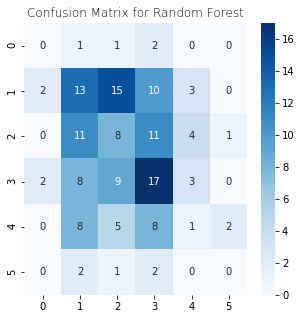

In [25]:
# printing the confusion matrix
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest', fontweight = 15, fontsize = 12)
plt.show()